In [ ]:
# !gdown --id 1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP
# !gdown --id 1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
# !gdown --id 1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz

Downloading...
From: https://drive.google.com/uc?id=1bFx6uiQV-GUGwL3PwYRIYdmRCF9hS2bP
To: /content/FER-2013.zip
100% 63.3M/63.3M [00:00<00:00, 102MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1bUBWn2Osoc6Y1XskxF_o0JgWVFw0iV_6
To: /content/NonLinear_data.npy
100% 5.57k/5.57k [00:00<00:00, 9.58MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fB9P1Ha1ofQiYWU9wkLAxDZTbtp3Gfqz
To: /content/Auto_MPG_data.csv
100% 15.4k/15.4k [00:00<00:00, 12.2MB/s]


## Auto MPG

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/Auto_MPG_data.csv")
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [ ]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
X_train = train_dataset.copy()
X_test = test_dataset.copy()

y_train = X_train.pop('MPG')
y_test = X_test.pop('MPG')

X_train, y_train = X_train.to_numpy().astype(np.float32), y_train.to_numpy().astype(np.float32)
X_test, y_test = X_test.to_numpy().astype(np.float32), y_test.to_numpy().astype(np.float32) 

In [ ]:
X_train = ( X_train-X_train.mean(axis=0))/X_train.std(axis=0)
X_test = ( X_test-X_test.mean(axis=0))/X_test.std(axis=0)

### Linear Regression - MSE

In [ ]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[9])
])

opt = tf.optimizers.SGD(learning_rate=0.1)
linear_model.compile(optimizer=opt, loss='mse')
# linear_history = linear_model.fit( X_train, y_train, epochs=100, validation_split = 0.2)
linear_history = linear_model.fit( X_train, y_train, validation_data=(X_test, y_test) ,epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 186.3028 - val_loss: 27.9821
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 14.9610 - val_loss: 13.3115
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 12.5876 - val_loss: 14.7102
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 12.2361 - val_loss: 13.7759
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 11.9233 - val_loss: 12.0567
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 12.2374 - val_loss: 12.8119
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 11.5995 - val_loss: 13.7228
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 11.8700 - val_loss: 13.0174
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 11.8637 - val_loss: 12.8867
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 12.1303 - val_l

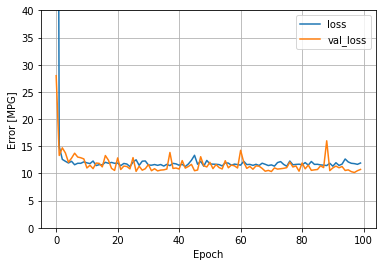

In [ ]:
plt.plot(linear_history.history['loss'], label='loss')
plt.plot(linear_history.history['val_loss'], label='val_loss')
plt.ylim([0, 40])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(linear_history.history)
hist['epoch'] = linear_history.epoch
hist.tail()

,loss,val_loss,epoch
95,12.113322,10.659599,95
96,11.867203,10.329941,96
97,11.805456,10.171907,97
98,11.675387,10.505253,98
99,11.917788,10.737993,99


### MLP for Regressuion - MSE

In [ ]:
#
MLP_Regression_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=[9], activation="relu"),
    tf.keras.layers.Dense(units=64,  activation="relu"),
    tf.keras.layers.Dense(units=1)
])
MLP_Regression_model.summary()
#
opt = tf.keras.optimizers.SGD(learning_rate=0.003)
MLP_Regression_model.compile(optimizer=opt,loss="mse")

#
# MLP_Regression_history = MLP_Regression_model.fit(X_train, y_train, batch_size=X_train.shape[0], epochs=100, validation_split = 0.2)
MLP_Regression_history = MLP_Regression_model.fit( X_train, y_train, validation_data=(X_test, y_test) ,epochs=100)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 64)                640       
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dense_33 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 0s 15ms/step - loss: 325.3499 - val_loss: 29.3910
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 22.0500 - val_loss: 10.6989
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 11.7612 - val_loss: 9.2907
Epoch 4/100

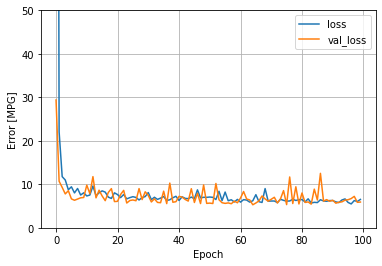

In [ ]:
plt.plot(MLP_Regression_history.history['loss'], label='loss')
plt.plot(MLP_Regression_history.history['val_loss'], label='val_loss')
plt.ylim([0, 50])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MLP_Regression_history.history)
hist['epoch'] = MLP_Regression_history.epoch
hist.tail()

,loss,val_loss,epoch
95,5.825389,6.458331,95
96,5.489255,6.722828,96
97,6.258672,7.229808,97
98,6.047821,5.858921,98
99,6.524374,5.921834,99


### Linear Regression - MAE

In [ ]:
linear_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[9])
])

opt = tf.optimizers.SGD(learning_rate=0.1)
linear_model.compile(optimizer=opt, loss='mae')
# linear_history = linear_model.fit( X_train, y_train, epochs=100, validation_split = 0.2)
linear_history = linear_model.fit( X_train, y_train, validation_data=(X_test, y_test) ,epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 12ms/step - loss: 22.8836 - val_loss: 22.9910
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 21.8876 - val_loss: 21.9910
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 20.8807 - val_loss: 20.9910
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 19.8790 - val_loss: 19.9910
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 18.8839 - val_loss: 18.9910
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 17.8812 - val_loss: 17.9910
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 16.8791 - val_loss: 16.9910
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 15.8881 - val_loss: 15.9910
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 14.8846 - val_loss: 14.9910
Epoch 10/100
10/10 [==============================] - 0s 4ms/step - loss: 13.8776 - val_lo

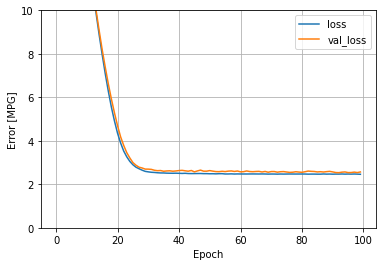

In [ ]:
plt.plot(linear_history.history['loss'], label='loss')
plt.plot(linear_history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(linear_history.history)
hist['epoch'] = linear_history.epoch
hist.tail()

,loss,val_loss,epoch
95,2.473064,2.539577,95
96,2.469085,2.541829,96
97,2.474271,2.560871,97
98,2.468146,2.540800,98
99,2.461008,2.567628,99


### MLP for Regressuion - MAE

In [ ]:
#
MLP_Regression_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, input_shape=[9], activation="relu"),
    tf.keras.layers.Dense(units=64,  activation="relu"),
    tf.keras.layers.Dense(units=1)
])
MLP_Regression_model.summary()
#
opt = tf.keras.optimizers.SGD(learning_rate=0.03)
MLP_Regression_model.compile(optimizer=opt,loss="mae")

#
# MLP_Regression_history = MLP_Regression_model.fit(X_train, y_train, batch_size=X_train.shape[0], epochs=100, validation_split = 0.2)
MLP_Regression_history = MLP_Regression_model.fit( X_train, y_train, validation_data=(X_test, y_test) ,epochs=100)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                640       
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
10/10 [==============================] - 0s 14ms/step - loss: 22.7159 - val_loss: 22.0056
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 19.1204 - val_loss: 14.8699
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 7.9520 - val_loss: 3.1953
Epoch 4/100
1

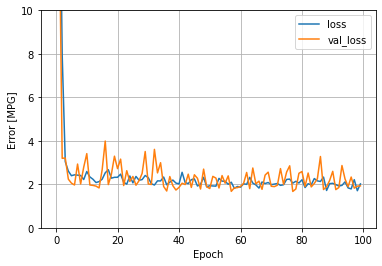

In [ ]:
plt.plot(MLP_Regression_history.history['loss'], label='loss')
plt.plot(MLP_Regression_history.history['val_loss'], label='val_loss')
plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()
plt.grid(True)

In [ ]:
hist = pd.DataFrame(MLP_Regression_history.history)
hist['epoch'] = MLP_Regression_history.epoch
hist.tail()

,loss,val_loss,epoch
95,1.835487,1.892358,95
96,1.787911,2.334141,96
97,2.213546,1.821699,97
98,1.705247,1.916743,98
99,2.018368,1.928074,99


## Non-Linear Data

In [ ]:
import math
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_path = "/content/NonLinear_data.npy"
data = np.load(data_path, allow_pickle=True).item()
X, labels = data["X"], data["labels"]
X, labels = X.astype(np.float32), labels.astype(np.float32)


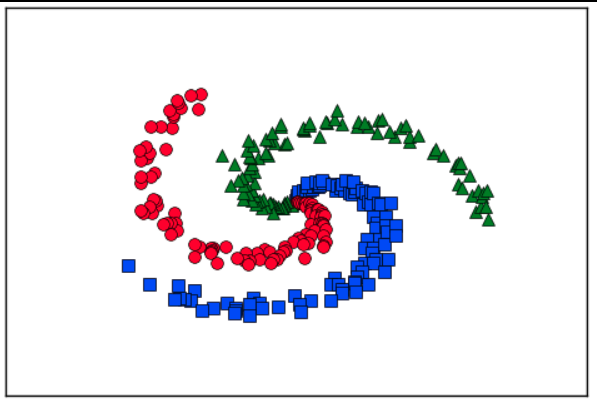

### Softmax Regression

In [ ]:
num_class = 3

#
SR_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[2]),
    tf.keras.layers.Dense(units=num_class, activation="softmax")
])
SR_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=2)
# metric = tf.keras.metrics.SparseCategoricalAccuracy()
SR_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
SR_history = SR_model.fit(X, labels, batch_size=X.shape[0], epochs=500)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 232ms/step - loss: 0.9436 - accuracy: 0.5200
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 0.9148 - accuracy: 0.5067
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.8915 - accuracy: 0.5267
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.8724 - accuracy: 0.5333
Epoch 5/500
1/1 [==============================] - 0s 4ms/step - l

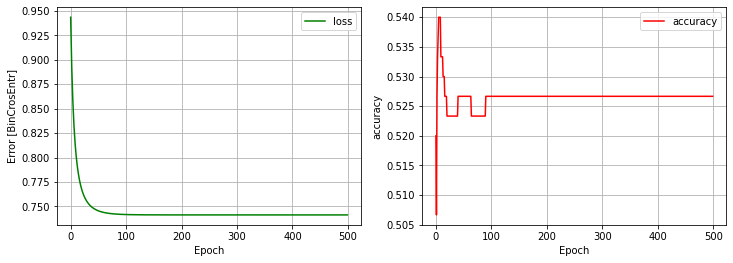

In [ ]:

# plt.plot(SR_history.history['val_loss'], label='val_loss')
# plt.ylim([0, 10])
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(SR_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(SR_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)



In [ ]:
hist = pd.DataFrame(SR_history.history)
hist['epoch'] = SR_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.74124,0.526667,495
496,0.74124,0.526667,496
497,0.74124,0.526667,497
498,0.74124,0.526667,498
499,0.74124,0.526667,499


### MLP - relu

In [ ]:
num_class = 3

#
MLP_N_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=([2])),
    tf.keras.layers.Dense(units=128, activation="relu"),
    tf.keras.layers.Dense(units=num_class, activation="softmax")
])
MLP_N_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=2)
# metric = tf.keras.metrics.SparseCategoricalAccuracy()
MLP_N_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
MLP_N_history = MLP_N_model.fit(X, labels, batch_size=X.shape[0], epochs=500)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 2)                 0         
                                                                 
 dense_7 (Dense)             (None, 128)               384       
                                                                 
 dense_8 (Dense)             (None, 3)                 387       
                                                                 
Total params: 771
Trainable params: 771
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
1/1 [==============================] - 0s 220ms/step - loss: 1.0869 - accuracy: 0.4833
Epoch 2/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9926 - accuracy: 0.5267
Epoch 3/500
1/1 [==============================] - 0s 4ms/step - loss: 0.9220 - accuracy: 0.5600
Epoch 4/500
1/1 [==========

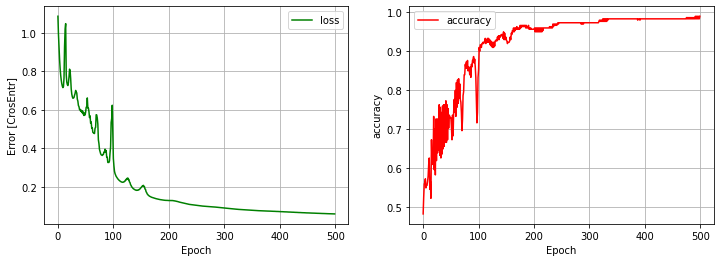

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_N_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_N_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)




In [ ]:
hist = pd.DataFrame(MLP_N_history.history)
hist['epoch'] = MLP_N_history.epoch
hist.tail()

,loss,accuracy,epoch
495,0.060583,0.990000,495
496,0.060410,0.983333,496
497,0.060385,0.990000,497
498,0.060178,0.983333,498
499,0.060167,0.990000,499


## FER - 2013

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [ ]:
# !unzip -q "/content/FER-2013.zip"

replace test/angry/PrivateTest_10131363.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


### Cách xử lý data 1

In [2]:
batch_size = 256
img_height = 180
img_width = 180
train_dir = "C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train" 
test_dir = "C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\test"   

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 22968 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size,
  color_mode="grayscale")

Found 28709 files belonging to 7 classes.
Using 5741 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


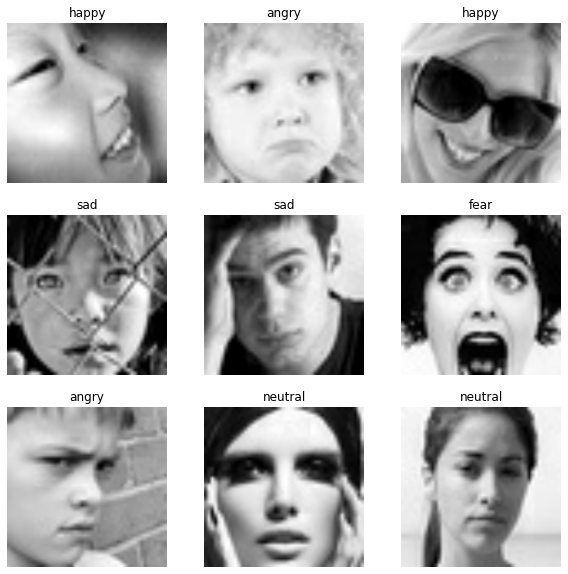

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.squeeze(images[i].numpy()).astype("uint8"), cmap="gray")
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Softmax Regression

In [8]:
num_class = 7

#
FER_SR_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(180,180,1)),
    tf.keras.layers.Dense(units=num_class, activation="softmax")
])
FER_SR_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# metric = tf.keras.metrics.SparseCategoricalAccuracy()
FER_SR_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
FER_SR_history = FER_SR_model.fit(train_ds, validation_data=val_ds, epochs=30)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 32400)             0         
                                                                 
 dense (Dense)               (None, 7)                 226807    
                                                                 
Total params: 226,807
Trainable params: 226,807
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
90/90 [==============================] - 65s 684ms/step - loss: 1987023.5000 - accuracy: 0.1792 - val_loss: 1321372.6250 - val_accuracy: 0.1411
Epoch 2/30
90/90 [==============================] - 19s 210ms/step - loss: 1867092.6250 - accuracy: 0.1834 - val_loss: 1479431.0000 - val_accuracy: 0.2667
Epoch 3/30
90/90 [==============================] - 1s 15ms/step - loss: 1673176.3750 - accuracy: 0.1992 - val_loss: 1843774.1250 - val_

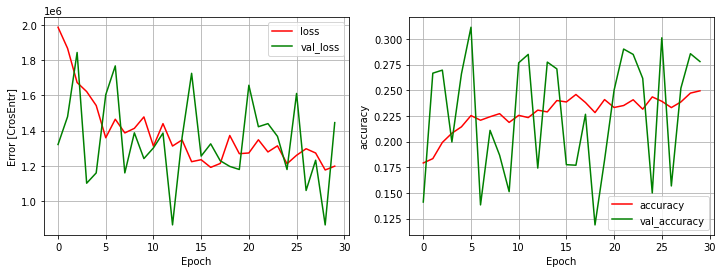

In [9]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(FER_SR_history.history['loss'], label='loss', color='red')
plt.plot(FER_SR_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(FER_SR_history.history['accuracy'], label='accuracy', color='red')
plt.plot(FER_SR_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


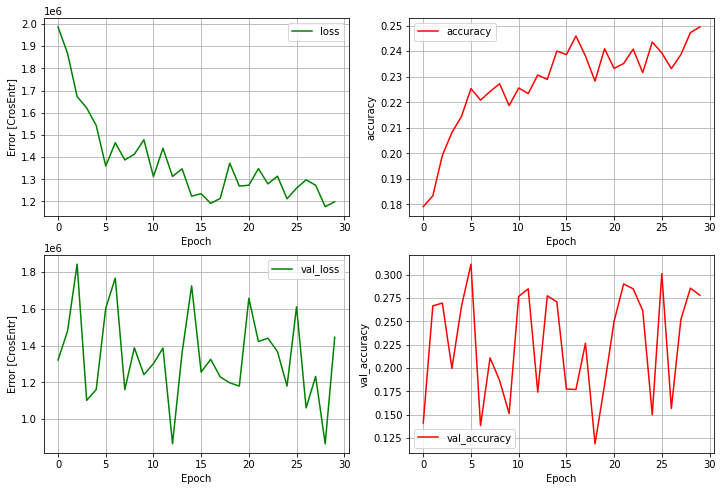

In [10]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(FER_SR_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(FER_SR_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.plot(FER_SR_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(FER_SR_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [11]:
hist = pd.DataFrame(FER_SR_history.history)
hist['epoch'] = FER_SR_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,1260142.875,0.239289,1.611233e+06,0.301167,25
26,1297413.250,0.233150,1.060518e+06,0.156767,26
27,1273034.250,0.238636,1.232078e+06,0.252047,27
28,1176775.875,0.247257,8.649108e+05,0.285665,28
29,1198516.250,0.249478,1.445570e+06,0.278000,29


### Cách xử lý data 2

In [20]:
import numpy as np
import pandas as pd
import pathlib
import os
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 

batch_size = 128
img_height = 180
img_width = 180
image_count = 28709 
train_dir = pathlib.Path("C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train") 
test_dir = pathlib.Path("C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\test") 


In [21]:
list_ds = tf.data.Dataset.list_files(str(train_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [22]:
for f in list_ds.take(7):
  print(f.numpy())

b'C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train\\fear\\Training_97698124.jpg'
b'C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train\\neutral\\Training_20434627.jpg'
b'C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train\\surprise\\Training_5105827.jpg'
b'C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train\\sad\\Training_64329093.jpg'
b'C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train\\sad\\Training_51568323.jpg'
b'C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train\\happy\\Training_71353309.jpg'
b'C:\\Users\\FPTSHOP 206THD\\Documents\\AI\\MLP\\Fer-2013\\train\\neutral\\Training_77976444.jpg'


In [23]:
class_names = np.array(sorted([item.name for item in train_dir.glob('*')]))
print(class_names)

['angry' 'disgust' 'fear' 'happy' 'neutral' 'sad' 'surprise']


In [24]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

In [25]:
# number of data
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

22968
5741


In [28]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [29]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=1)
  # Resize the image to the desired size
  img = tf.image.resize(img, [img_height, img_width])
  # normalize
  img = (img - 127.5)/255.0
  return img

In [30]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
# for f in list_ds.take(7):
#   print(f.numpy())
#   print(process_path(f.numpy())[1])

In [31]:
AUTOTUNE = tf.data.AUTOTUNE
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [33]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 1)
Label:  4


In [34]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=512)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

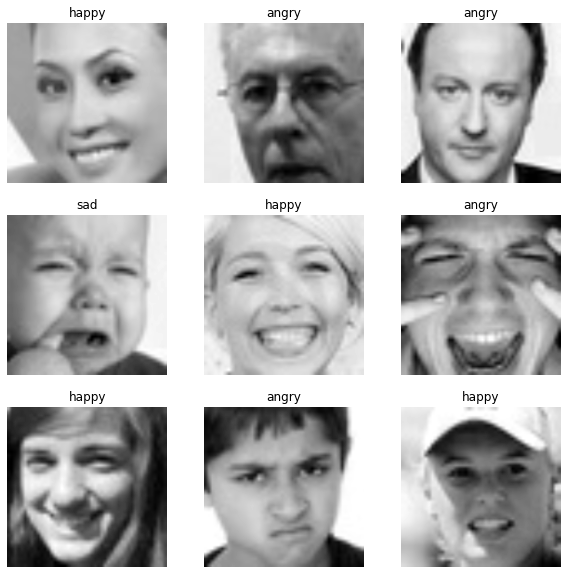

In [35]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  minv = image_batch[i].numpy().min()
  maxv = image_batch[i].numpy().max()
  plt.imshow(np.squeeze(image_batch[i].numpy()), vmin=minv, vmax=maxv, cmap="gray")
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

### Softmax Regression Norm

In [36]:
num_class = 7

#
FER_SRN_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(180,180,1)),
    tf.keras.layers.Dense(units=num_class, activation="softmax")
])
FER_SRN_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# metric = tf.keras.metrics.SparseCategoricalAccuracy()
FER_SRN_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
FER_SRN_history = FER_SRN_model.fit(train_ds, validation_data=val_ds, epochs=30)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 32400)             0         
                                                                 
 dense_1 (Dense)             (None, 7)                 226807    
                                                                 
Total params: 226,807
Trainable params: 226,807
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
180/180 [==============================] - 56s 309ms/step - loss: 1.7595 - accuracy: 0.3074 - val_loss: 1.7521 - val_accuracy: 0.3222
Epoch 2/30
180/180 [==============================] - 34s 191ms/step - loss: 1.7001 - accuracy: 0.3396 - val_loss: 1.6895 - val_accuracy: 0.3543
Epoch 3/30
180/180 [==============================] - 31s 172ms/step - loss: 1.6790 - accuracy: 0.3545 - val_loss: 1.7204 - val_accuracy: 0.3407
Epoch 4/3

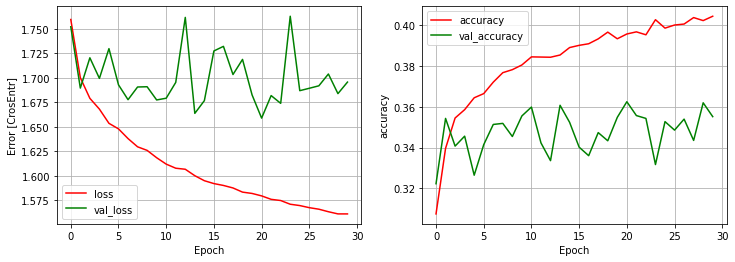

In [37]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(FER_SRN_history.history['loss'], label='loss', color='red')
plt.plot(FER_SRN_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(FER_SRN_history.history['accuracy'], label='accuracy', color='red')
plt.plot(FER_SRN_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


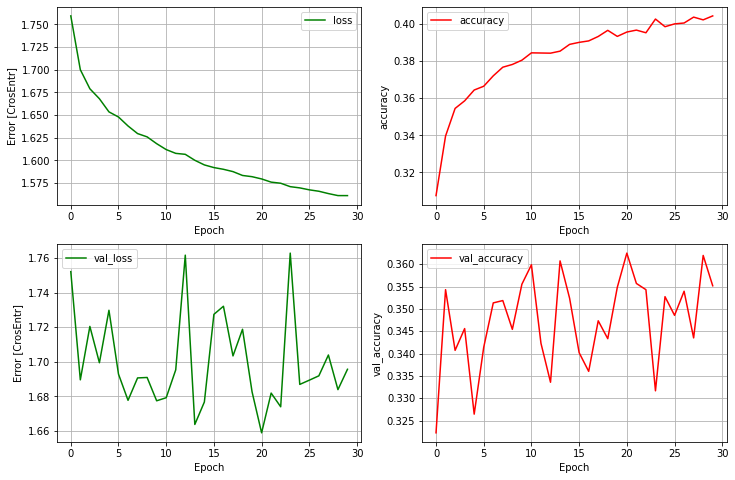

In [38]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(FER_SRN_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(FER_SRN_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(FER_SRN_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(FER_SRN_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [39]:
hist = pd.DataFrame(FER_SRN_history.history)
hist['epoch'] = FER_SRN_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,1.567423,0.400122,1.689286,0.348546,25
26,1.565865,0.400601,1.691803,0.353945,26
27,1.563286,0.403779,1.703854,0.343494,27
28,1.561065,0.402299,1.683814,0.361958,28
29,1.561050,0.404432,1.695587,0.355165,29


### MLP - tanh

In [ ]:
num_class = 7

#
MLP_tanh_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(180,180,1)),
    tf.keras.layers.Dense(units=1024, activation="tanh"),
    tf.keras.layers.Dense(units=512, activation="tanh"),
    tf.keras.layers.Dense(units=256, activation="tanh"),
    tf.keras.layers.Dense(units=num_class, activation="softmax")
])
MLP_tanh_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# metric = tf.keras.metrics.SparseCategoricalAccuracy()
MLP_tanh_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
MLP_tanh_history = MLP_tanh_model.fit(train_ds, validation_data=val_ds, epochs=30)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 32400)             0         
                                                                 
 dense_2 (Dense)             (None, 1024)              33178624  
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 33,836,551
Trainable params: 33,836,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
180/180 [======================

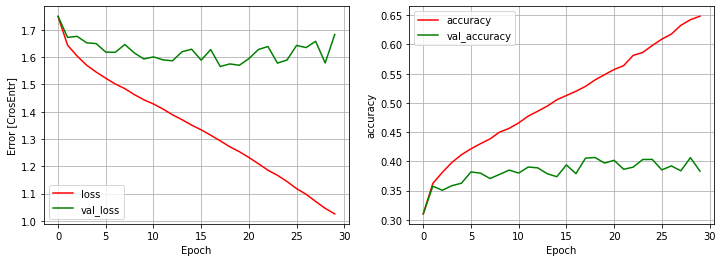

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_tanh_history.history['loss'], label='loss', color='red')
plt.plot(MLP_tanh_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_tanh_history.history['accuracy'], label='accuracy', color='red')
plt.plot(MLP_tanh_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


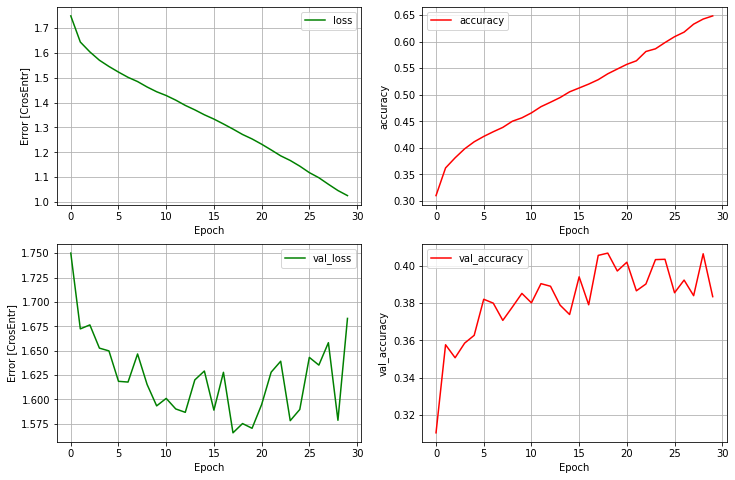

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(MLP_tanh_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(MLP_tanh_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(MLP_tanh_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(MLP_tanh_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [ ]:
hist = pd.DataFrame(MLP_tanh_history.history)
hist['epoch'] = MLP_tanh_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,1.118240,0.609152,1.643115,0.385473,25
26,1.097588,0.617773,1.635211,0.392266,26
27,1.071273,0.632793,1.658195,0.383905,27
28,1.046041,0.642372,1.578622,0.406375,28
29,1.025617,0.648293,1.683070,0.383383,29


### MLP - relu

In [ ]:
num_class = 7

#
MLP_relu_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(180,180,1)),
    tf.keras.layers.Dense(units=1024, activation="relu"),
    tf.keras.layers.Dense(units=512, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=num_class, activation="softmax")
])
MLP_relu_model.summary()
#
loss = tf.keras.losses.SparseCategoricalCrossentropy()
opt = tf.keras.optimizers.SGD(learning_rate=0.01)
# metric = tf.keras.metrics.SparseCategoricalAccuracy()
MLP_relu_model.compile(optimizer=opt,loss=loss, metrics=['accuracy'])

#
MLP_relu_history = MLP_relu_model.fit(train_ds, validation_data=val_ds, epochs=30)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 32400)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              33178624  
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 33,836,551
Trainable params: 33,836,551
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
180/180 [======================

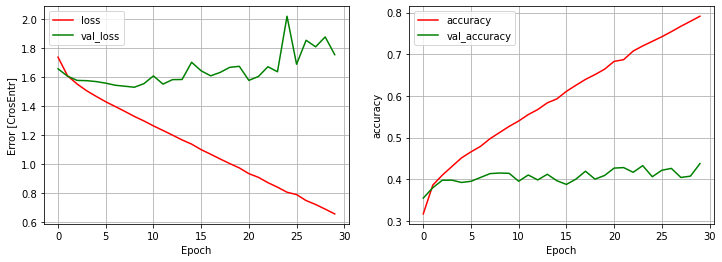

In [ ]:
fig = plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(MLP_relu_history.history['loss'], label='loss', color='red')
plt.plot(MLP_relu_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(MLP_relu_history.history['accuracy'], label='accuracy', color='red')
plt.plot(MLP_relu_history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)


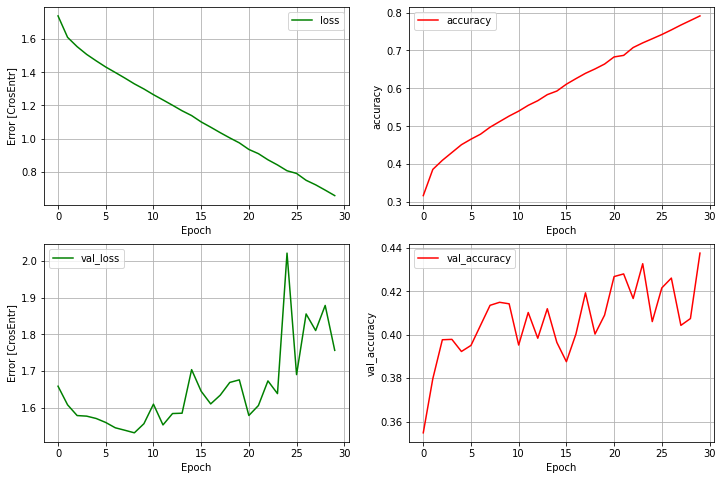

In [ ]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(MLP_relu_history.history['loss'], label='loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(MLP_relu_history.history['accuracy'], label='accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(MLP_relu_history.history['val_loss'], label='val_loss', color='green')
plt.xlabel('Epoch')
plt.ylabel('Error [CrosEntr]')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(MLP_relu_history.history['val_accuracy'], label='val_accuracy', color='red')
plt.xlabel('Epoch')
plt.ylabel('val_accuracy')
plt.legend()
plt.grid(True)


In [ ]:
hist = pd.DataFrame(MLP_relu_history.history)
hist['epoch'] = MLP_relu_history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.791150,0.742119,1.690345,0.421529,25
26,0.749862,0.754354,1.855738,0.426058,26
27,0.722616,0.767241,1.810505,0.404285,27
28,0.690692,0.779215,1.878904,0.407420,28
29,0.657688,0.791362,1.756460,0.437554,29
